In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the dataset
dataset = pd.read_csv('mnist_train.csv')
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [3]:
# Checking the dataset
dataset.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


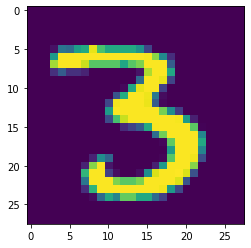

In [4]:
# Taking a sample data from the dataset and checking it
sample = dataset.iloc[12,1:].values
sample = sample.reshape(28,28).astype('uint8')
plt.imshow(sample)

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [6]:
# Fitting the Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier()
regressor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# Predicting the result using Random Forest Classifer
y_pred = regressor.predict(X_test)

In [8]:
# Creating confusion matrix to evaluate the accuracy of prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Checking the confusion matrix
cm

array([[1185,    0,    1,    0,    1,    2,    3,    0,    5,    0],
       [   0, 1320,    9,    1,    4,    0,    0,    7,    0,    1],
       [   5,    2, 1203,    6,    5,    0,    3,   12,    7,    2],
       [   2,    0,   11, 1170,    0,   15,    0,   10,   11,    6],
       [   1,    2,    2,    0, 1086,    0,    8,    3,    3,   21],
       [   4,    1,    2,   16,    1, 1037,    6,    0,   15,    6],
       [   7,    0,    0,    0,    0,    6, 1154,    0,    5,    0],
       [   3,    6,    8,    0,    7,    0,    0, 1245,    4,    7],
       [   2,    4,   10,   12,    5,    5,    3,    1, 1114,   12],
       [   3,    4,    2,    5,   14,    2,    2,   14,   12, 1099]],
      dtype=int64)

In [9]:
# Checking the accuracy of the prediction
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.96775